# Percentage of days when TN > 90th percentile
Let TNij be the daily minimum temperature on day i in period j and let TNin90 be the calendar day 90th percentile centred on a 5-day window for the base period 1961-1990. The percentage of time for the base period is determined where TNij > TNin90. To avoid possible inhomogeneity across the in-base and out-base periods, the calculation for the base period (1961-1990) requires the use of a bootstrap processure. Details are described in Zhang et al. (2005)

https://climpact-sci.org/indices/#index-TN90p

This indicator is based off of PCCM's methodology for the Annual amount of cold days index

## Requirements: 
Run downloadGHCNd.ipynb located /1_atmosphere/downloadGHCnd.ipynb to download the required GHCNd data


In [1]:
import pandas as pd
import numpy as np
import os
from datetime import datetime

In [2]:
for x in os.listdir("../../GHCNd/pkl/"):
    if x[-4:] == ".pkl" and "_PALAU." not in x:
        if "AIRTEMP" in x:
            curr_df = pd.read_pickle("../../GHCNd/pkl/" + x)
            if datetime.strptime(str(curr_df["DATE"][0]), '%Y-%m-%d') < datetime(1960, 12, 31) and datetime.strptime(str(max(curr_df["DATE"])), '%Y-%m-%d') > datetime(1990, 12, 31):
                print( "VALID : " + x)
            else:
                
                print("INVALID : " + x)
            print(curr_df["DATE"][0],curr_df["DATE"][len(curr_df['DATE'])-1])
            print(min(curr_df["DATE"]),max(curr_df["DATE"]))

INVALID : AIRTEMP_PELELIU_PSC00914712.pkl
1991-06-01 2023-11-30
1991-06-01 2023-11-30
INVALID : AIRTEMP_AIMELIK_BABELTHUAP_PSC00914015.pkl
1954-07-01 1955-08-31
1954-07-01 1955-08-31
INVALID : AIRTEMP_PELELIU_ISLAND_PALAU_ISLANDS_PSW00040305.pkl
1945-05-01 1947-05-31
1945-05-01 1947-05-31
INVALID : AIRTEMP_KOROR_ISLAND_NF_PSW00040307.pkl
1947-07-11 1951-03-31
1947-07-11 1951-03-31
INVALID : AIRTEMP_NGASANG_BABELTHUAP_PSC00914580.pkl
1972-05-01 1978-12-24
1972-05-01 1978-12-24
INVALID : AIRTEMP_NEKKEN_FORESTRY_PSC00914519.pkl
1983-05-01 2023-11-30
1983-05-01 2023-11-30
VALID : AIRTEMP_KOROR_PSW00040309.pkl
1951-07-01 2024-01-07
1951-07-01 2024-01-07
INVALID : AIRTEMP_MARICULTURE_CENTER_PSC00914478.pkl
1990-04-02 2004-02-27
1990-04-02 2004-02-27
INVALID : AIRTEMP_WEATHER_SERVICE_OFFICE_PALAU_PSC00914913.pkl
2004-01-01 2024-01-07
2004-01-01 2024-01-07
INVALID : AIRTEMP_ANGUAR_PSC00914030.pkl
1955-07-08 1974-03-31
1955-07-08 1974-03-31


In [3]:
df = pd.read_pickle("../../GHCND/pkl/AIRTEMP_KOROR_PSW00040309.pkl")

In [4]:
#There is an issue when downloading the data through https://www.ncei.noaa.gov/data/global-historical-climatology-network-daily/access/
#You can see that the TMIN is wrong, it would be too cold for Palau if it was Kelvin, it is because the
#decimal point is missing from the data
df

,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,TMAX,TMIN,TOBS
0,PSW00040309,1951-07-01,7.33674,134.47686,27.4,"KOROR, PW PS",322.0,239.0,NaN
1,PSW00040309,1951-07-02,7.33674,134.47686,27.4,"KOROR, PW PS",317.0,244.0,NaN
2,PSW00040309,1951-07-03,7.33674,134.47686,27.4,"KOROR, PW PS",306.0,239.0,NaN
3,PSW00040309,1951-07-04,7.33674,134.47686,27.4,"KOROR, PW PS",289.0,233.0,NaN
4,PSW00040309,1951-07-05,7.33674,134.47686,27.4,"KOROR, PW PS",311.0,239.0,NaN
...,...,...,...,...,...,...,...,...,...
25810,PSW00040309,2023-12-18,7.33674,134.47686,27.4,"KOROR, PW PS",306.0,261.0,NaN
25811,PSW00040309,2024-01-03,7.33674,134.47686,27.4,"KOROR, PW PS",306.0,261.0,NaN
25812,PSW00040309,2024-01-04,7.33674,134.47686,27.4,"KOROR, PW PS",294.0,267.0,NaN
25813,PSW00040309,2024-01-05,7.33674,134.47686,27.4,"KOROR, PW PS",306.0,256.0,NaN


In [6]:
df['TMAX'] = df['TMAX']/10
df['TMIN'] = df['TMIN']/10

In [7]:
df

,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,TMAX,TMIN,TOBS
0,PSW00040309,1951-07-01,7.33674,134.47686,27.4,"KOROR, PW PS",32.2,23.9,NaN
1,PSW00040309,1951-07-02,7.33674,134.47686,27.4,"KOROR, PW PS",31.7,24.4,NaN
2,PSW00040309,1951-07-03,7.33674,134.47686,27.4,"KOROR, PW PS",30.6,23.9,NaN
3,PSW00040309,1951-07-04,7.33674,134.47686,27.4,"KOROR, PW PS",28.9,23.3,NaN
4,PSW00040309,1951-07-05,7.33674,134.47686,27.4,"KOROR, PW PS",31.1,23.9,NaN
...,...,...,...,...,...,...,...,...,...
25810,PSW00040309,2023-12-18,7.33674,134.47686,27.4,"KOROR, PW PS",30.6,26.1,NaN
25811,PSW00040309,2024-01-03,7.33674,134.47686,27.4,"KOROR, PW PS",30.6,26.1,NaN
25812,PSW00040309,2024-01-04,7.33674,134.47686,27.4,"KOROR, PW PS",29.4,26.7,NaN
25813,PSW00040309,2024-01-05,7.33674,134.47686,27.4,"KOROR, PW PS",30.6,25.6,NaN


In [8]:
df['DATE'] = pd.to_datetime(df['DATE'], format='%Y-%m-%d')

In [9]:
df['DAY'] = "2024-" + df['DATE'].dt.strftime('%m-%d')

In [10]:
df['DAY'] = pd.to_datetime(df['DAY'], format='%Y-%m-%d')

In [11]:
df

,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,TMAX,TMIN,TOBS,DAY
0,PSW00040309,1951-07-01,7.33674,134.47686,27.4,"KOROR, PW PS",32.2,23.9,NaN,2024-07-01
1,PSW00040309,1951-07-02,7.33674,134.47686,27.4,"KOROR, PW PS",31.7,24.4,NaN,2024-07-02
2,PSW00040309,1951-07-03,7.33674,134.47686,27.4,"KOROR, PW PS",30.6,23.9,NaN,2024-07-03
3,PSW00040309,1951-07-04,7.33674,134.47686,27.4,"KOROR, PW PS",28.9,23.3,NaN,2024-07-04
4,PSW00040309,1951-07-05,7.33674,134.47686,27.4,"KOROR, PW PS",31.1,23.9,NaN,2024-07-05
...,...,...,...,...,...,...,...,...,...,...
25810,PSW00040309,2023-12-18,7.33674,134.47686,27.4,"KOROR, PW PS",30.6,26.1,NaN,2024-12-18
25811,PSW00040309,2024-01-03,7.33674,134.47686,27.4,"KOROR, PW PS",30.6,26.1,NaN,2024-01-03
25812,PSW00040309,2024-01-04,7.33674,134.47686,27.4,"KOROR, PW PS",29.4,26.7,NaN,2024-01-04
25813,PSW00040309,2024-01-05,7.33674,134.47686,27.4,"KOROR, PW PS",30.6,25.6,NaN,2024-01-05


In [12]:
from pandas import Timestamp

In [13]:
def centered_percentile(date, base_df, variable_name):
    
    filtered_df = base_df[(base_df["DATE"] >= datetime(1960, 12, 29))&(base_df["DATE"] <= datetime(1991, 1, 2))]
    window_values = []
    for x in filtered_df[filtered_df['DAY'] == date]['DATE']:

        window_values.extend(list(filtered_df[(filtered_df['DATE'] >= x - pd.Timedelta(days=2)) &
                     (filtered_df['DATE'] <= x + pd.Timedelta(days=2))][variable_name]))
    if variable_name == "TMAX":
        return np.percentile(window_values,q=90)
    elif variable_name == "TMIN":
        return np.percentile(window_values,q=10)
        
        

In [14]:
# Adjust column names and data accordingly.

def exceedance_rate_for_base_period(climate_data, variable_name):
    # Create an empty DataFrame to store the exceedance rates for each iteration
    exceedance_rates = {}
    all_exceedance_data = {}

    # Loop through each year in the dataset
    for out_of_base_year in range(1961, 1990 + 1):
        print(out_of_base_year)
        # Extract base period data (29 years)
        base_period_data = climate_data[~(climate_data['DATE'].dt.year == out_of_base_year)].copy()
        out_of_base_data = climate_data[climate_data['DATE'].dt.year == out_of_base_year].copy()
        # Loop through each in-base year to construct 30-year blocks
        exceedance_dict = {}
        for in_base_year in [year for year in range(1961, 1990 + 1) if year != out_of_base_year]:
            # Construct a 30-year block by repeating one in-base year
            block_data = pd.concat([base_period_data, climate_data[climate_data['DATE'].dt.year == in_base_year]])
            out_of_base_data['THRESHOLD'] = out_of_base_data['DAY'].apply(lambda day_value: centered_percentile(day_value,base_period_data,variable_name))
            
            # Calculate exceedance rate for the out-of-base year
            
            if variable_name == "TMAX":
                exceedance_rate = (out_of_base_data[variable_name]>out_of_base_data['THRESHOLD']).mean()     
            elif variable_name == "TMIN":
                exceedance_rate = (out_of_base_data[variable_name]<out_of_base_data['THRESHOLD']).mean()   
            
            # Store the exceedance rate for this iteration
            # Should the exceedance rate be calculated from the average?
            exceedance_dict[in_base_year] = exceedance_rate
            
        exceedance_rates[out_of_base_year] = sum(exceedance_dict.values()) / len(exceedance_dict)
#         print(sum(exceedance_dict.values()) / len(exceedance_dict))
        all_exceedance_data[out_of_base_year] = exceedance_dict

    return exceedance_rates, all_exceedance_data



In [15]:
def exceedance_rate_for_outbase_period(climate_data, variable_name):
 
    # Generate a date range for every day in 2024
    start_date = '2024-01-01'
    end_date = '2024-12-31'
    date_range = pd.date_range(start_date, end_date, freq='D')

    # Create an empty DataFrame with date ragne to store the exceedance rates
    df_exceedance = pd.DataFrame({'DAY': date_range})


    df_exceedance['THRESHOLD'] = df_exceedance['DAY'].apply(lambda day_value: centered_percentile(day_value,climate_data,variable_name))

    return df_exceedance

In [149]:
temp_table = {}

In [16]:
exceed_rates_TMAX = exceedance_rate_for_outbase_period(df, "TMAX")

In [17]:
exceed_rates_TMIN = exceedance_rate_for_outbase_period(df, "TMIN")

In [18]:
TMAX_dict = dict(zip(exceed_rates_TMAX['DAY'], exceed_rates_TMAX['THRESHOLD']))

In [19]:
TMIN_dict = dict(zip(exceed_rates_TMIN['DAY'], exceed_rates_TMIN['THRESHOLD']))

In [20]:
df_exceed = df.copy()

In [21]:
df_exceed['THRESHOLD_TMAX'] = df_exceed['DAY'].apply(lambda day_value:TMAX_dict.get(day_value))
df_exceed['HOT_DAY'] = df_exceed[['TMAX',"THRESHOLD_TMAX"]].apply(lambda x: x["TMAX"] > x["THRESHOLD_TMAX"],axis=1)

df_exceed['THRESHOLD_TMIN'] = df_exceed['DAY'].apply(lambda day_value:TMIN_dict.get(day_value))
df_exceed['COLD_DAY'] = df_exceed[['TMIN',"THRESHOLD_TMIN"]].apply(lambda x: x["TMIN"] < x["THRESHOLD_TMIN"],axis=1)


In [22]:
df_exceed['HOT_DAY'].mean()

0.10799922525663375

In [23]:
df_exceed[df_exceed["DATE"] > datetime(1990, 12, 31)]['HOT_DAY'].mean()

0.1874231512383629

In [24]:
df_exceed['YEAR'] = pd.DatetimeIndex(df['DATE']).year

In [25]:
out_of_base_hot = {}
out_of_base_cold = {}
for x in df_exceed["YEAR"].unique():
    if x > 1990:
        out_of_base_hot[x] = df_exceed[df_exceed["YEAR"] == x]['HOT_DAY'].mean()
        out_of_base_cold[x] = df_exceed[df_exceed["YEAR"] == x]['COLD_DAY'].mean()

In [28]:
df

,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,TMAX,TMIN,TOBS,DAY
0,PSW00040309,1951-07-01,7.33674,134.47686,27.4,"KOROR, PW PS",32.2,23.9,NaN,2024-07-01
1,PSW00040309,1951-07-02,7.33674,134.47686,27.4,"KOROR, PW PS",31.7,24.4,NaN,2024-07-02
2,PSW00040309,1951-07-03,7.33674,134.47686,27.4,"KOROR, PW PS",30.6,23.9,NaN,2024-07-03
3,PSW00040309,1951-07-04,7.33674,134.47686,27.4,"KOROR, PW PS",28.9,23.3,NaN,2024-07-04
4,PSW00040309,1951-07-05,7.33674,134.47686,27.4,"KOROR, PW PS",31.1,23.9,NaN,2024-07-05
...,...,...,...,...,...,...,...,...,...,...
25810,PSW00040309,2023-12-18,7.33674,134.47686,27.4,"KOROR, PW PS",30.6,26.1,NaN,2024-12-18
25811,PSW00040309,2024-01-03,7.33674,134.47686,27.4,"KOROR, PW PS",30.6,26.1,NaN,2024-01-03
25812,PSW00040309,2024-01-04,7.33674,134.47686,27.4,"KOROR, PW PS",29.4,26.7,NaN,2024-01-04
25813,PSW00040309,2024-01-05,7.33674,134.47686,27.4,"KOROR, PW PS",30.6,25.6,NaN,2024-01-05


In [29]:
import pickle 

In [24]:
#run below lines later
ex_cold, all_cold = exceedance_rate_for_base_period(df, "TMIN")

with open('ex_cold.pkl', 'wb') as f:
    pickle.dump(ex_cold, f)
with open('all_cold.pkl', 'wb') as f:
    pickle.dump(all_cold, f)

1961
0.08219178082191773
1962
0.04657534246575342
1963
0.06027397260273971
1964
0.09289617486338798
1965
0.07397260273972604
1966
0.0575342465753425
1967
0.07123287671232874
1968
0.09562841530054644
1969
0.05205479452054791
1970
0.021917808219178093
1971
0.06575342465753421
1972
0.0874316939890711
1973
0.03561643835616437
1974
0.07671232876712326
1975
0.0547945205479452
1976
0.024590163934426246
1977
0.030136986301369854
1978
0.08493150684931507
1979
0.0904109589041096
1980
0.10109289617486346
1981
0.12876712328767115
1982
0.04657534246575342
1983
0.06027397260273971
1984
0.0819672131147541
1985
0.11780821917808215
1986
0.03561643835616437
1987
0.030136986301369854
1988
0.04098360655737705
1989
0.043835616438356186
1990
0.032876712328767106


In [374]:
ex_hot, all_hot = exceedance_rate_for_base_period(df, "TMAX")

with open('ex_hot.pkl', 'wb') as f:
    pickle.dump(ex_hot, f)
with open('all_hot.pkl', 'wb') as f:
    pickle.dump(all_hot, f)

1961
0.0027397260273972616
1962
0.0136986301369863
1963
0.016438356164383553
1964
0.03005464480874318
1965
0.0027397260273972616
1966
0.021917808219178093
1967
0.0136986301369863
1968
0.07103825136612024
1969
0.019178082191780816
1970
0.04109589041095887
1971
0.06027397260273971
1972
0.04644808743169399
1973
0.13972602739726037
1974
0.06301369863013702
1975
0.05205479452054791
1976
0.051912568306010896
1977
0.03561643835616437
1978
0.04657534246575342
1979
0.04109589041095887
1980
0.06557377049180331
1981
0.043835616438356186
1982
0.008219178082191777
1983
0.032876712328767106
1984
0.0382513661202186
1985
0.06027397260273971
1986
0.09589041095890406
1987
0.1369863013698631
1988
0.1775956284153005
1989
0.13150684931506842
1990
0.12876712328767115


In [34]:
import matplotlib.pyplot as plt

In [150]:
# with open('all_hot.pkl', 'rb') as handle:
#     all_hot = pickle.load(handle)
with open('ex_hot.pkl', 'rb') as handle:
    ex_hot = pickle.load(handle)

In [151]:
# with open('all_cold.pkl', 'rb') as handle:
#     all_cold = pickle.load(handle)
with open('ex_cold.pkl', 'rb') as handle:
    ex_cold = pickle.load(handle)

In [ ]:
#Take average of 1961 to 1990 and subtract it from relevant year to calc % anomaly

In [152]:
all_hot = ex_hot|out_of_base_hot
all_cold = ex_cold|out_of_base_cold

In [153]:
cold_bar = sum(ex_cold.values()) / len(ex_cold)
hot_bar = sum(ex_hot.values()) / len(ex_hot)

In [154]:
hot_anom = {}

for x in all_hot:
    hot_anom[x] = 100*(all_hot[x]-hot_bar)

cold_anom = {}
for x in all_cold:
    cold_anom[x] = 100*(all_cold[x]-cold_bar)

In [155]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

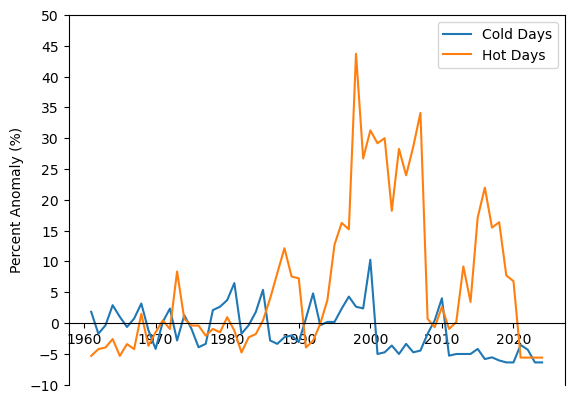

In [75]:
fig, ax = plt.subplots()
ax.plot(cold_anom.keys(),cold_anom.values(), label = "Cold Nights")
ax.plot(hot_anom.keys(),hot_anom.values(), label = "Hot Days")
ax.set_ylim(-10, 50)

ax.spines['bottom'].set_position('zero')
ax.legend()
ax.set_ylabel('Percent Anomaly (%)')
ax.yaxis.set_major_locator(MultipleLocator(5))
plt.show()

In [ ]:
# Create a plot
fig, ax = plt.subplots()

# Plot the data with labels and colors
ax.plot(cold_anom.keys(), cold_anom.values(), label="Cold Nights", color='blue')

# Set the y-axis limits
ax.set_ylim(-10, 60)  # Adjust the values as needed

# Move the x-axis up within the plot
ax.spines['bottom'].set_position('zero')

# Add y-axis label
ax.set_ylabel('Percent Anomaly (%)')

# Add legend
ax.legend()

# Fit trend lines

x_cold = np.arange(len(cold_anom))
slope_cold, intercept_cold = np.polyfit(x_cold, list(cold_anom.values()), 1)
ax.plot(cold_anom.keys(), np.polyval([slope_cold, intercept_cold], x_cold), '--', color='blue', label='Trend line (Cold Nights)')


# Set y-axis major locator
ax.yaxis.set_major_locator(MultipleLocator(5))

# Show the plot
plt.savefig('amount-of-cold-nights-percent-anom.png', format='png',dpi=300,facecolor='white')
plt.show()

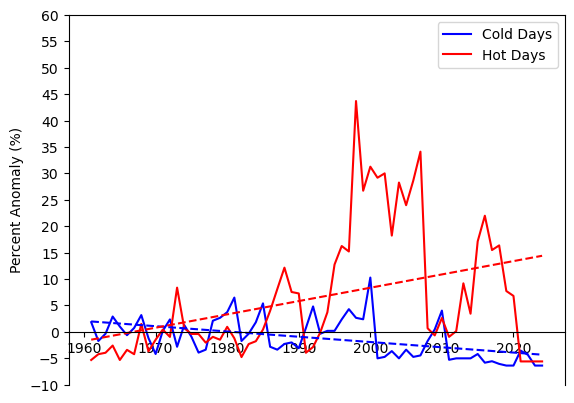

In [157]:
# Create a plot
fig, ax = plt.subplots()

# Plot the data with labels and colors
ax.plot(cold_anom.keys(), cold_anom.values(), label="Cold Nights", color='blue')
ax.plot(hot_anom.keys(), hot_anom.values(), label="Hot Days", color='red')

# Set the y-axis limits
ax.set_ylim(-10, 60)  # Adjust the values as needed

# Move the x-axis up within the plot
ax.spines['bottom'].set_position('zero')

# Add y-axis label
ax.set_ylabel('Percent Anomaly (%)')

# Add legend
ax.legend()

# Fit trend lines
x_cold = np.arange(len(cold_anom))
slope_cold, intercept_cold = np.polyfit(x_cold, list(cold_anom.values()), 1)
ax.plot(cold_anom.keys(), np.polyval([slope_cold, intercept_cold], x_cold), '--', color='blue', label='Trend line (Cold Nights)')

x_hot = np.arange(len(hot_anom))
slope_hot, intercept_hot = np.polyfit(x_hot, list(hot_anom.values()), 1)
ax.plot(hot_anom.keys(), np.polyval([slope_hot, intercept_hot], x_hot), '--', color='red', label='Trend line (Hot Days)')



# Set y-axis major locator
ax.yaxis.set_major_locator(MultipleLocator(5))

plt.savefig('amount-of-hot-cold-days-percent-anom.png', format='png',dpi=300,facecolor='white')

# Show the plot
plt.show()

In [ ]:
fig, ax = plt.subplots()



x_cold = np.arange(len(all_cold))
slope_cold, intercept_cold = np.polyfit(x_cold, [value * 100 for value in all_cold.values()], 1)
ax.plot(all_cold.keys(),[value * 100 for value in all_cold.values()], label = "Cold Days",color="blue")
ax.plot(all_cold.keys(), np.polyval([slope_cold, intercept_cold], x_cold),'--', label='Trend line (Cold Days)',color="blue")


temp_table["Annual Amount of Hot Days"] = slope_hot*10

ax.legend()
ax.set_ylabel('Percent Occurences (%)')
ax.yaxis.set_major_locator(MultipleLocator(5))
plt.savefig('amount-of-cold-days-percent-occurences.png', format='png',dpi=300,facecolor='white')
plt.show()

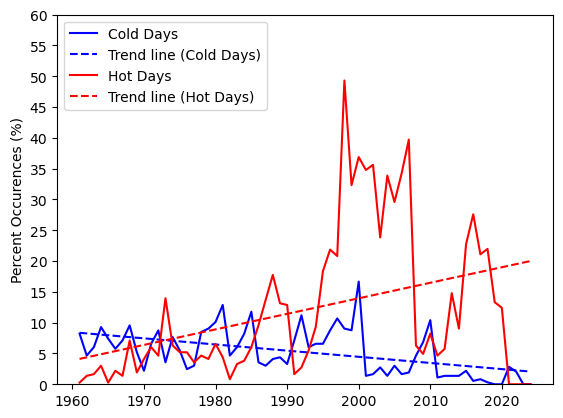

In [158]:
fig, ax = plt.subplots()


x_cold = np.arange(len(all_cold))
slope_cold, intercept_cold = np.polyfit(x_cold, [value * 100 for value in all_cold.values()], 1)
ax.plot(all_cold.keys(),[value * 100 for value in all_cold.values()], label = "Cold Nights",color="blue")
ax.plot(all_cold.keys(), np.polyval([slope_cold, intercept_cold], x_cold),'--', label='Trend line (Cold Days)',color="blue")

x_hot = np.arange(len(all_hot))
slope_hot, intercept_hot = np.polyfit(x_hot, [value * 100 for value in all_hot.values()], 1)
ax.plot(all_hot.keys(),[value * 100 for value in all_hot.values()], label = "Hot Days", color = "red")
ax.plot(all_hot.keys(), np.polyval([slope_hot, intercept_hot], x_hot),'--', label='Trend line (Hot Days)',color="red")
ax.set_ylim(0, 60)

temp_table["Annual Amount of Hot Days"] = slope_hot*10
temp_table["Annual Amount of Cold Nights"] = slope_cold*10

ax.legend()
ax.set_ylabel('Percent Occurences (%)')
ax.yaxis.set_major_locator(MultipleLocator(5))
plt.savefig('amount-of-hot-cold-days-percent-occurences.png', format='png',dpi=300,facecolor='white')
plt.show()